# Simple Linear Regression With Python

The data set contains information about money spent on advertisement and their generated sales. Money was spent on 
TV, radio and newspaper ads.

## Problem

**How advertisement spending impacts to sales ?**

In [1]:
# Importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading data
The ```Advertising.csv``` is located under ```dataset``` directory 

In [2]:
# Reads the dataset using panda and create a dataframe object
data = pd.read_csv("dataset/Advertising.csv")

# Check how the data looks like
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
# Since the column "Unnamed: 0" is redundant, remove the colum from dataframe 
data = data.drop(['Unnamed: 0'], axis='columns')

# Check the updated dataset
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Modelling

#### We will consider effect of TV ads on sales.

#### Let's visualize the dataset on scatter plot.
#### We use ```matplotlib``` , a popular Python plotting library to make a scatter plot.

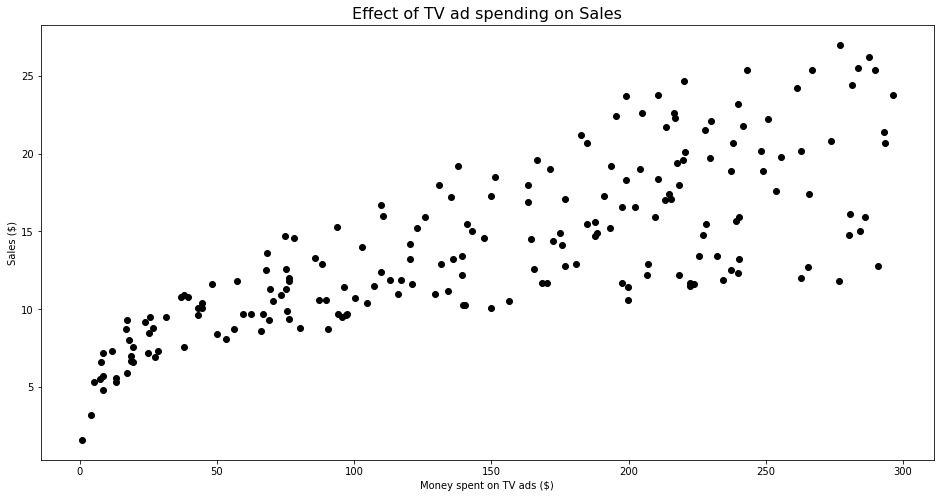

In [5]:
dependent_var = data['sales']
independent_var = data['TV']
plot_color = 'black'

plt.figure(figsize=(16, 8))
plt.scatter(
    independent_var,
    dependent_var,
    c = plot_color
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Effect of TV ad spending on Sales", fontdict = {'fontsize': 16})
plt.show()

As you can see, there is a clear relationship between the amount spent on TV ads and sales. The direction is **positive** and the strength is **moderate**.

#### Let’s see how we can generate a linear approximation of this data.

In [6]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The intercepter is: ", reg.intercept_[0])
print("The coefficent is: ", reg.coef_[0][0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The intercepter is:  7.032593549127693
The coefficent is:  0.047536640433019764
The linear model is: Y = 7.0326 + 0.047537X


#### Let’s visualize how the line fits the data.

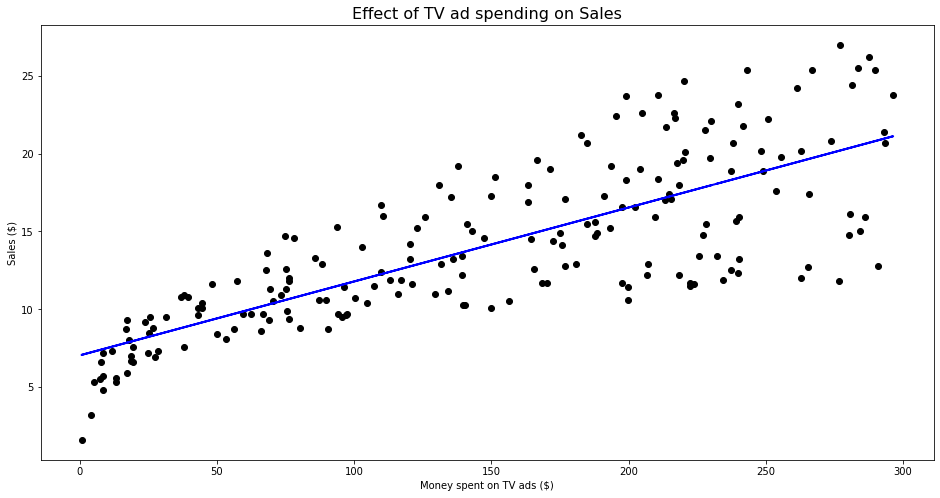

In [7]:
dependent_var = data['sales']
independent_var = data['TV']
plot_color = 'black'

predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    independent_var,
    dependent_var,
    c = plot_color
)
plt.plot(
    independent_var,
    predictions,
    c = 'blue',
    linewidth = 2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Effect of TV ad spending on Sales", fontdict = {'fontsize': 16})
plt.show()

## Assessing the relevancy of the model
we need to look at the R² value and the p-value from each coefficient.

In [8]:
X = data['TV']
y = data['sales']

# Adds a column of ones to an array (X)
X2 = sm.add_constant(X)

# A simple ordinary least squares model.
est = sm.OLS(y, X2)

# Full fit of the model.
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        11:56:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/Users/nadisha/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Looking at both coefficients, we have a **p-value** that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).

Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability of sales is explained by the amount spent on TV ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.